In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [77]:
df=pd.read_csv('C:/jupyter practice datasets/deliveries.csv')

In [78]:
print(df)
print(df.isnull().sum())

        match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman non_striker      bowler  is_super

In [81]:
df['player_dismissed'].fillna('Not Out', inplace=True)   # No player dismissed
df['dismissal_kind'].fillna('None', inplace=True)        # No dismissal occurred
df['fielder'].fillna('None', inplace=True)               # No fielder involved


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21720\4199736232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['player_dismissed'].fillna('Not Out', inplace=True)   # No player dismissed
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21720\4199736232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [89]:
print(df.isnull().sum())

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [91]:
#1.Average Run Rate per over
# Calculated average runs per over
avg_run_rate = df.groupby('over')['total_runs'].mean().reset_index()



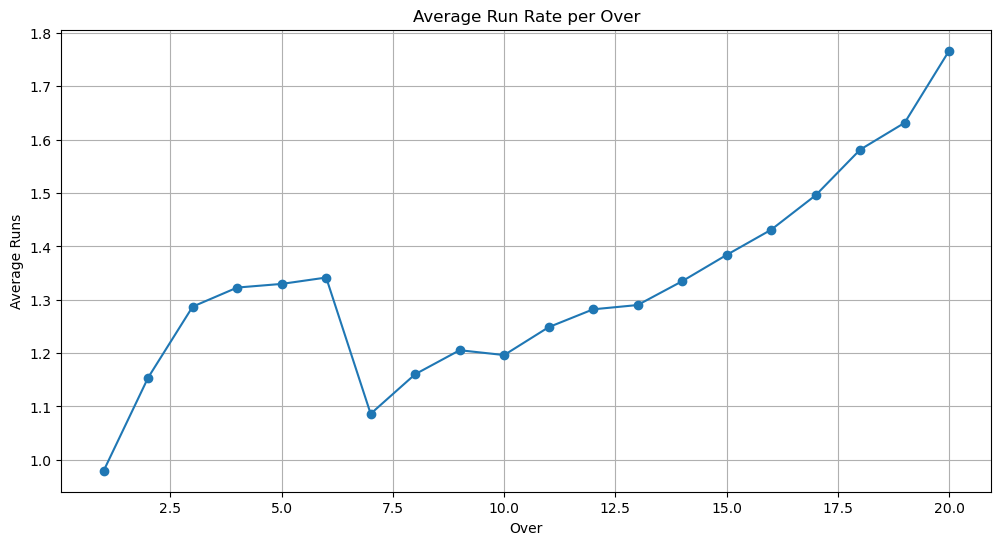

In [93]:
#line plot
plt.figure(figsize=(12, 6))
plt.plot(avg_run_rate['over'], avg_run_rate['total_runs'], marker='o')
plt.title('Average Run Rate per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.grid()
plt.show()


In [95]:
#2.Wicket Fall Distribution by Over
# Filter for rows where a wicket fell
wickets_per_over = df[df['player_dismissed'].notnull()].groupby('over').size().reset_index(name='wickets')


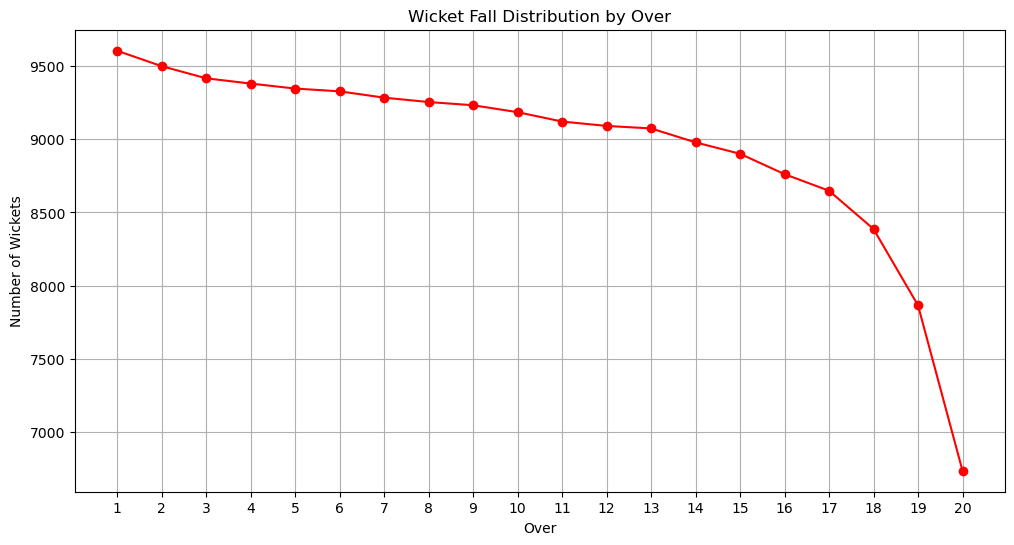

In [97]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(wickets_per_over['over'], wickets_per_over['wickets'], marker='o', color='red')
plt.title('Wicket Fall Distribution by Over')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.xticks(wickets_per_over['over'])
plt.grid()
plt.show()

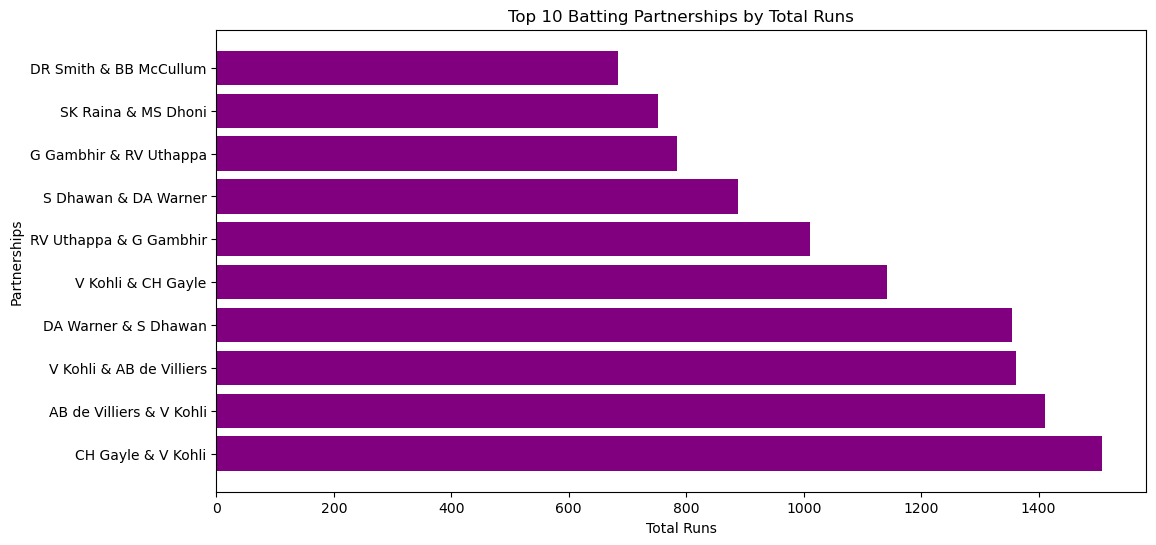

In [100]:
#3.Partnership Analysis (Top 10 Partnerships by Total Runs)
# Create a new column for partnership by grouping batsman and non-striker
partnerships = df.groupby(['batsman', 'non_striker'])['batsman_runs'].sum().reset_index()

# Find the top 10 partnerships
top_partnerships = partnerships.nlargest(10, 'batsman_runs')

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_partnerships['batsman'] + ' & ' + top_partnerships['non_striker'], top_partnerships['batsman_runs'], color='purple')
plt.title('Top 10 Batting Partnerships by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Partnerships')
plt.show()


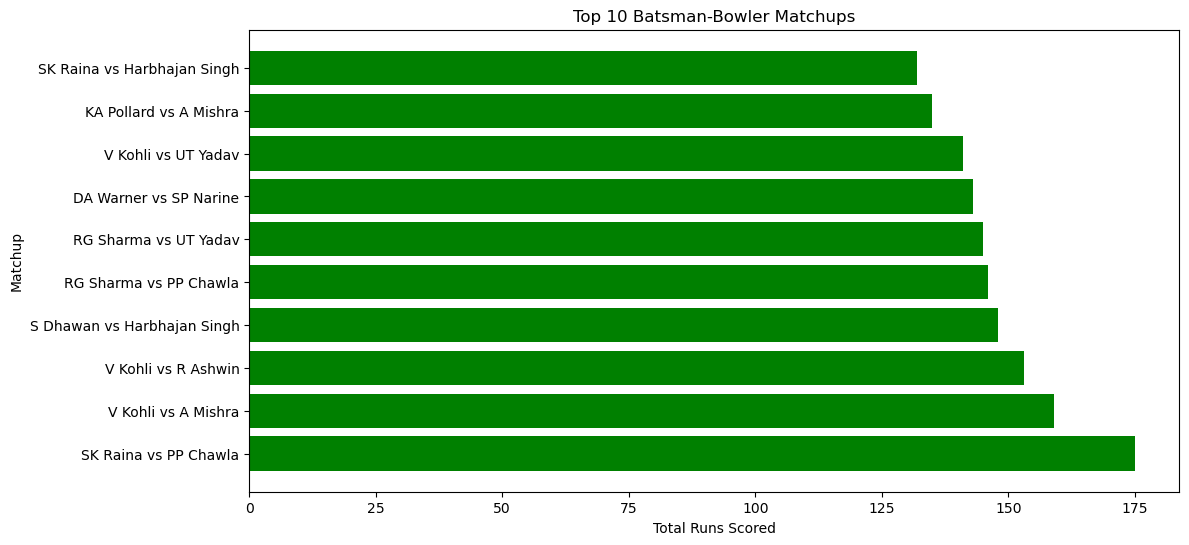

In [101]:
#4.Batsman vs Bowler Analysis
# Group by batsman and bowler to aggregate runs scored
batsman_bowler = df.groupby(['batsman', 'bowler'])['batsman_runs'].sum().reset_index()

# Find the top 10 pairs
top_batsman_bowler = batsman_bowler.nlargest(10, 'batsman_runs')

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_batsman_bowler['batsman'] + ' vs ' + top_batsman_bowler['bowler'], top_batsman_bowler['batsman_runs'], color='green')
plt.title('Top 10 Batsman-Bowler Matchups')
plt.xlabel('Total Runs Scored')
plt.ylabel('Matchup')
plt.show()


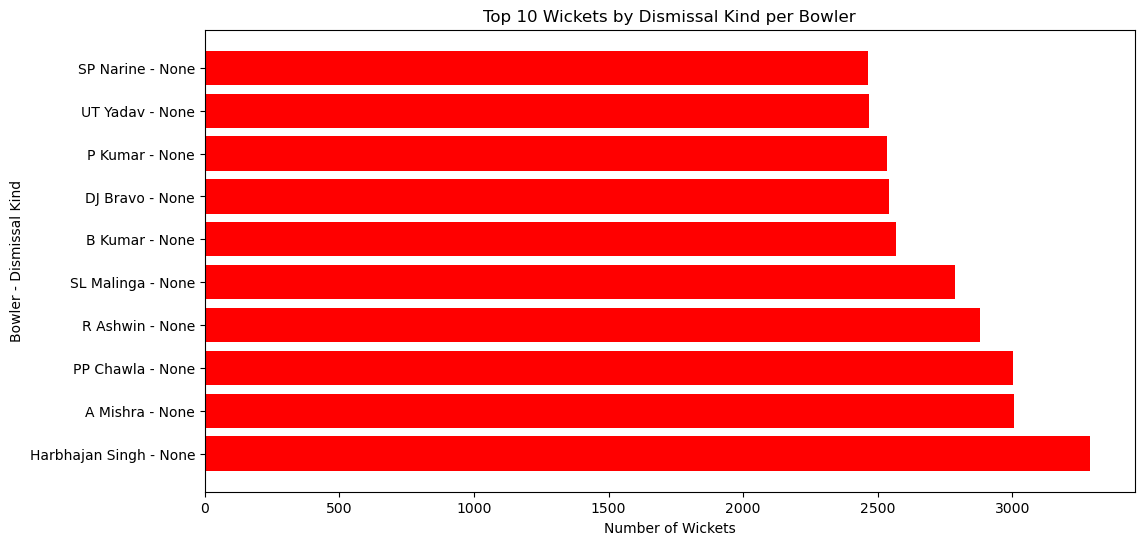

In [103]:
#5.Wickets by Dismissal Kind per Bowler
# Filter for deliveries where a wicket was taken
dismissals = df[df['player_dismissed'].notnull()].groupby(['bowler', 'dismissal_kind']).size().reset_index(name='wickets')

# Find the top 10 combinations
top_dismissals = dismissals.nlargest(10, 'wickets')

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_dismissals['bowler'] + ' - ' + top_dismissals['dismissal_kind'], top_dismissals['wickets'], color='red')
plt.title('Top 10 Wickets by Dismissal Kind per Bowler')
plt.xlabel('Number of Wickets')
plt.ylabel('Bowler - Dismissal Kind')
plt.show()


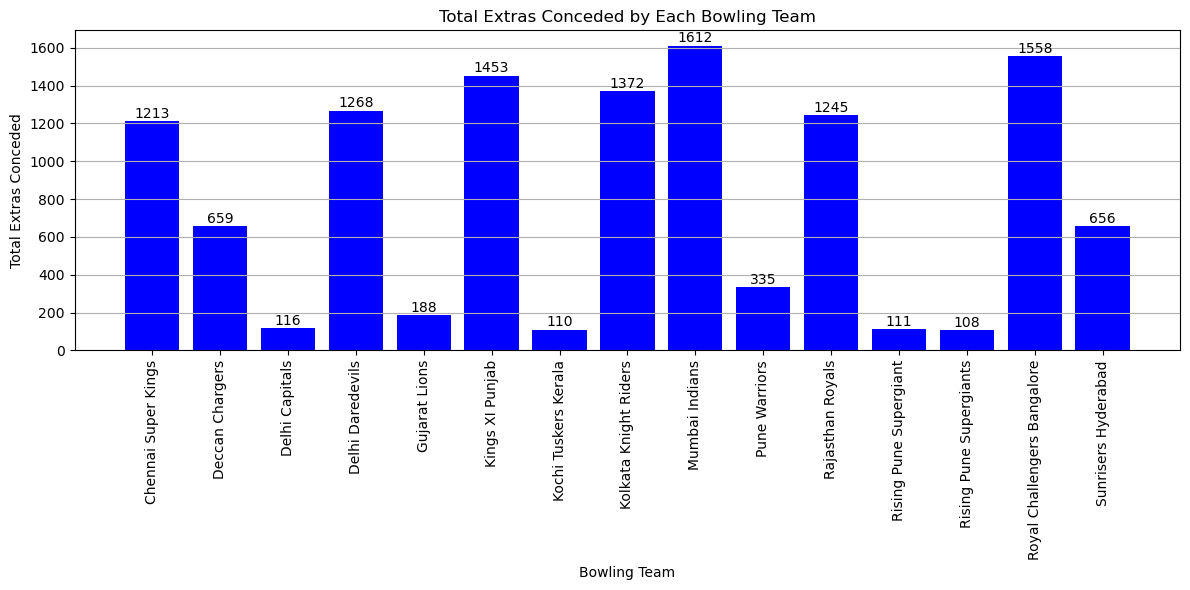

In [104]:
#6.Wickets by Dismissal Kind per Bowler
# Group by bowling team and sum the extra runs
extras_conceded = df.groupby('bowling_team')['extra_runs'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(extras_conceded['bowling_team'], extras_conceded['extra_runs'], color='blue')

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.title('Total Extras Conceded by Each Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Total Extras Conceded')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to fit labels nicely
plt.show()
